In [1]:
from scipy.io import netcdf
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import netCDF4
import numpy as np
import rioxarray
import xarray as xr

import pprint

# help(netCDF4._netCDF4.Dataset)

In [5]:
f_path = './data/nasa/MERRA2_400.tavgM_2d_flx_Nx.202301.nc4'
nc_data = netCDF4.Dataset(f_path)

nc_data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Contact: http://gmao.gsfc.nasa.gov
    History: Original file generated: Sun Feb 12 03:42:11 2023 GMT
    Filename: MERRA2_400.tavgM_2d_flx_Nx.202301.nc4
    Comment: GMAO filename: d5124_m2_jan10.tavg1_2d_flx_Nx.monthly.202301.nc4
    Source: CVS tag: GEOSadas-5_12_4_p37_SLES12_M2-OPS experiment_id: d5124_m2_jan10
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2TMNXFLX
    RangeBeginningDate: 2023-01-01
    RangeEndingDate: 2023-01-31
    GranuleID: MERRA2_400.tavgM_2d_flx_Nx.202301.nc4
    ProductionDateTime: Original file generated: Sun Feb 12 03:42:11 2023 GMT
    LongName: MERRA2 tavg1_2d_flx_Nx: 2d,1-Hourly,Time-Ave

In [6]:

# Precipitation related variables:
nc_vars = nc_data.variables

pprint.pprint([ncv for ncv in nc_vars.values() if 'precip' in ncv.long_name])

for d in nc_data.dimensions.items():
    print(d)

[<class 'netCDF4._netCDF4.Variable'>
float32 PGENTOT(time, lat, lon)
    long_name: Total_column_production_of_precipitation
    units: kg m-2 s-1
    _FillValue: 1000000000000000.0
    missing_value: 1000000000000000.0
    fmissing_value: 1000000000000000.0
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
unlimited dimensions: time
current shape = (1, 361, 576)
filling on,
 <class 'netCDF4._netCDF4.Variable'>
float32 PRECANV(time, lat, lon)
    long_name: anvil_precipitation
    units: kg m-2 s-1
    _FillValue: 1000000000000000.0
    missing_value: 1000000000000000.0
    fmissing_value: 1000000000000000.0
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
unlimited dimensions: time
current shape = (1, 361, 576)
filling on,
 <class 'netCDF4._netCDF4.Variable'>
float32 PRECCON(time, lat, lon)
    long_name: convective_precipitation
    units: kg m-2 s-1
    _FillValue: 1000000000000000.0
    missing

(1, 361, 576)


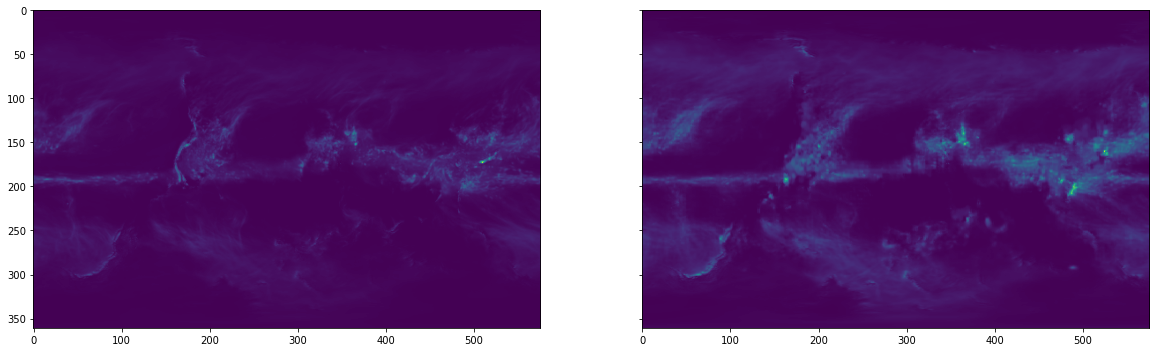

In [9]:
print(nc_data['PRECTOT'].shape)

plt.rcParams["figure.figsize"] = (20,7)
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row')

ax[0].imshow(nc_data['PRECTOT'][0,:,:], cmap='viridis')
ax[1].imshow(nc_data['PRECTOTCORR'][0,:,:], cmap='viridis')
plt.show()

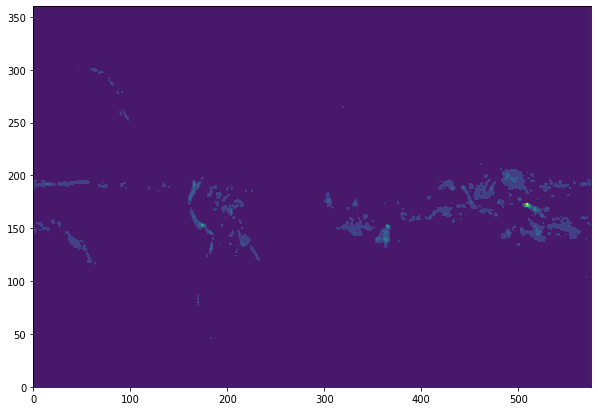

In [10]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,7)
cs = plt.contourf(nc_data['PRECTOT'][0,:,:])

In [83]:
f_path = './data/nasa/MERRA2_400.tavgM_2d_flx_Nx.202301.nc4'
xr_data = xr.open_dataset(f_path)

keys = ['PRECTOT','PRECTOTCORR']
xr_data[keys]

<xarray.Dataset>
Dimensions:      (time: 1, lat: 361, lon: 576)
Coordinates:
  * lon          (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat          (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time         (time) datetime64[ns] 2023-01-01T00:30:00
Data variables:
    PRECTOT      (time, lat, lon) float32 ...
    PRECTOTCORR  (time, lat, lon) float32 ...
Attributes: (12/30)
    Contact:                           http://gmao.gsfc.nasa.gov
    History:                           Original file generated: Sun Feb 12 03...
    Filename:                          MERRA2_400.tavgM_2d_flx_Nx.202301.nc4
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Source:                            CVS tag: GEOSadas-5_12_4_p37_SLES12_M2...
    Conventions:                       CF-1
    ...                                ...
    LatitudeResolution:                0.5
    LongitudeResolution:               0.625
    DataResolution:                    0.5 x 0.625
    identifier_product_doi:            10.5067/0JRLVL8YV2Y4
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000

In [12]:
df_data = xr_data.to_dataframe()
df_data.head()

BSTAR       CDH       CDM       CDQ  \
lon    lat   time                                                          
-180.0 -90.0 2023-01-01 00:30:00 -0.000832  0.003691  0.004463  0.003691   
       -89.5 2023-01-01 00:30:00 -0.000668  0.003392  0.004090  0.003392   
       -89.0 2023-01-01 00:30:00 -0.000394  0.003591  0.004345  0.003591   
       -88.5 2023-01-01 00:30:00 -0.000219  0.004211  0.005141  0.004211   
       -88.0 2023-01-01 00:30:00 -0.000430  0.005070  0.006275  0.005070   

                                        CN  DISPH     EFLUX          EVAP  \
lon    lat   time                                                           
-180.0 -90.0 2023-01-01 00:30:00  0.001350    0.0  0.284800  1.016501e-07   
       -89.5 2023-01-01 00:30:00  0.001351    0.0  0.254663  9.099502e-08   
       -89.0 2023-01-01 00:30:00  0.001351    0.0  0.282511  1.008765e-07   
       -88.5 2023-01-01 00:30:00  0.001351    0.0  0.332631  1.188921e-07   
       -88.0 2023-01-01 00:30:00  0.001351    0.0  0.328220  1.171822e-07   

                                     FRCAN  FRCCN  ...  Var_TAUY  \
lon    lat   time                                  ...             
-180.0 -90.0 2023-01-01 00:30:00  0.123745    0.0  ...  0.000397   
       -89.5 2023-01-01 00:30:00  0.112122    0.0  ...  0.000368   
       -89.0 2023-01-01 00:30:00  0.103758    0.0  ...  0.000529   
       -88.5 2023-01-01 00:30:00  0.107512    0.0  ...  0.000652   
       -88.0 2023-01-01 00:30:00  0.108196    0.0  ...  0.000683   

                                    Var_TCZPBL  Var_TLML    Var_TSH  \
lon    lat   time                                                     
-180.0 -90.0 2023-01-01 00:30:00  26694.929688  8.344255  10.808475   
       -89.5 2023-01-01 00:30:00  24377.244141  7.883019   9.987379   
       -89.0 2023-01-01 00:30:00  20996.748047  6.760076   8.351002   
       -88.5 2023-01-01 00:30:00  16876.121094  5.755670   6.738921   
       -88.0 2023-01-01 00:30:00  13560.036133  4.936391   5.077315   

                                  Var_TSTAR  Var_ULML  Var_USTAR  Var_VLML  \
lon    lat   time                                                            
-180.0 -90.0 2023-01-01 00:30:00   0.000405  5.603748   0.007810  3.820217   
       -89.5 2023-01-01 00:30:00   0.000479  6.025401   0.007582  4.044105   
       -89.0 2023-01-01 00:30:00   0.000695  8.575473   0.006561  5.949933   
       -88.5 2023-01-01 00:30:00   0.000812  9.707477   0.005895  6.628603   
       -88.0 2023-01-01 00:30:00   0.000647  9.370190   0.005970  6.131456   

                                       Var_Z0H       Var_Z0M  
lon    lat   time                                             
-180.0 -90.0 2023-01-01 00:30:00  3.448235e-14  2.208856e-13  
       -89.5 2023-01-01 00:30:00  3.448235e-14  2.208856e-13  
       -89.0 2023-01-01 00:30:00  3.448235e-14  2.208856e-13  
       -88.5 2023-01-01 00:30:00  3.448235e-14  2.208856e-13  
       -88.0 2023-01-01 00:30:00  3.448235e-14  2.208856e-13  

[5 rows x 92 columns]

/tmp/ipykernel_16757/2643534391.py:4: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_data[['PRECTOT','PRECTOTCORR']].plot(kind='hist',


count    2.079360e+05
mean     2.754015e-05
std      3.633419e-05
min      1.294353e-28
25%      5.365315e-06
50%      1.604701e-05
75%      3.562717e-05
max      1.182332e-03
Name: PRECTOT, dtype: float64

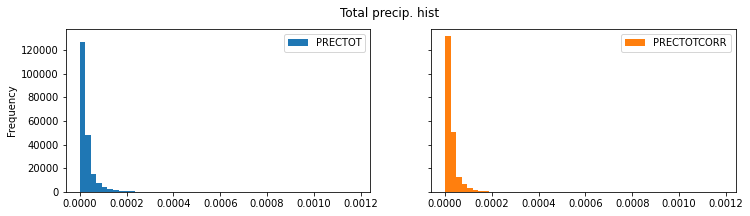

In [13]:
plt.rcParams["figure.figsize"] = (12,3)
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row')

df_data[['PRECTOT','PRECTOTCORR']].plot(kind='hist',
                                        ax=ax, subplots=True, sharex=True,sharey=True,
                                        title='Total precip. hist', 
                                        bins=50, )
df_data['PRECTOT'].describe()

In [1]:
from pydap.client import open_url
from pydap.cas.urs import setup_session

import src.da.nasaq as nasaq

keys = ['PRECTOT','PRECTOTCORR']

# for daily data: 'https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2/M2T1NXSLV.5.12.4/2016/06/MERRA2_400.tavg1_2d_slv_Nx.20160601.nc4
url_prefix = 'https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2_MONTHLY/M2TMNXFLX.5.12.4'
url_infix = 'MERRA2_400.tavgM_2d_flx_Nx.' # 2011-present - 400; 2001-2010 - 300; 1991-1999 - 200
    
years=list(range(2011,2022+1))
months = list(range(1,12+1))
days = list(range(1,365+1))

URLs = nasaq.build_urls(url_prefix, url_infix, years, months)
URLs = URLs + nasaq.build_urls(url_prefix, url_infix, [2023], [1])


username='alexandrugherega'
password ='A6Sbe7Vv6gSga%EY4J*t'

# print(URLs)

import time
#'https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2_MONTHLY/M2TMNXSLV.5.12.4/2023/MERRA2_400.tavgM_2d_slv_Nx.202301.nc4.html'
start = time.time()

# url = URLs[-16] #
# print(url)
# print('https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2_MONTHLY/M2TMNXFLX.5.12.4/2023/MERRA2_400.tavgM_2d_flx_Nx.202301.nc4')

# session = setup_session(username, password, check_url=url)
# result = nasaq._dap_query(session, url)[keys] 
result = nasaq.query(username, password, URLs, keys)

print(f'elapsed: {time.time() - start}')

result.to_netcdf('data/nasa/MERRA2-PRECTOTandCORR-2011-2023.nc4')
result.to_zarr('data/nasa/rainfall/')

/home/creator/.local/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
/home/creator/anaconda3/envs/tensorflow/lib/python3.9/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


elapsed: 3580.602012872696


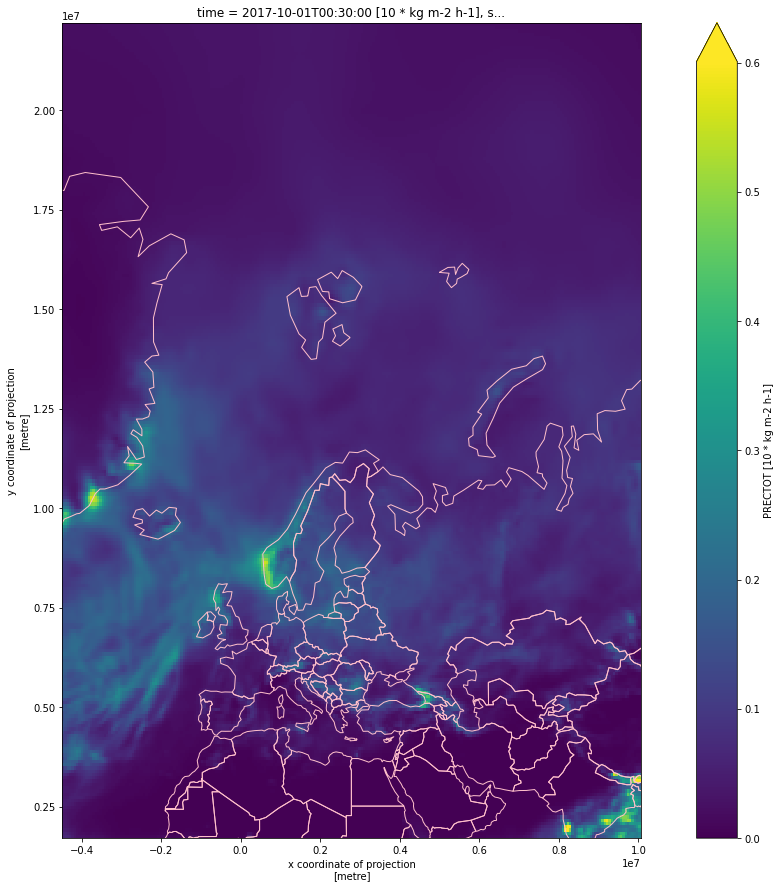

<xarray.Dataset>
Dimensions:      (lat: 151, lon: 209)
Coordinates:
  * lat          (lat) float64 15.0 15.5 16.0 16.5 17.0 ... 88.5 89.0 89.5 90.0
  * lon          (lon) float64 -40.0 -39.38 -38.75 -38.12 ... 88.75 89.38 90.0
    time         datetime64[ns] 2017-10-01T00:30:00
    spatial_ref  int64 0
Data variables:
    PRECTOT      (lat, lon) float32 0.06551 0.07603 0.07478 ... 0.03247 0.03247
    PRECTOTCORR  (lat, lon) float32 0.2174 0.2316 0.2139 ... 0.03247 0.03247
Attributes: (12/31)
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Contact:                           http://gmao.gsfc.nasa.gov
    Conventions:                       CF-1
    DODS_EXTRA.Unlimited_Dimension:    time
    DataResolution:                    0.5 x 0.625
    EasternmostLongitude:              179.375
    ...                                ...
    TemporalRange:                     1980-01-01 -> 2016-12-31
    Title:                             MERRA2 tavg1_2d_flx_Nx: 2d,1-Hourly,Ti...
    VersionID:                         5.12.4
    WesternmostLongitude:              -180.0
    identifier_product_doi:            10.5067/0JRLVL8YV2Y4
    identifier_product_doi_authority:  http://dx.doi.org/

In [33]:
import matplotlib as mpl
import geopandas as gpd
import rasterio
import rasterio.plot
from rasterio.enums import Resampling

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
# Reproject the data
world = world.to_crs("EPSG:3857") #countries.to_crs(epsg=3035)#epsg=4326)

# result['PRECTOT'][7,:,:].plot(cmap=og_map)#, norm=norm)
# plt.show()

normalizer_val = 10
local_data = xr.open_zarr('data/nasa/rainfall/')*3600
local_data = local_data.load()

for v in local_data.variables:
    local_data[v].attrs['units'] = f'{str(normalizer_val) + " * " if normalizer_val > 1 else ""}kg m-2 h-1'

vmins_vmaxs = xr.apply_ufunc(lambda x: np.array([np.min(x)/normalizer_val, np.max(x)/normalizer_val]), 
                             local_data, input_core_dims=[['time', 'lat', 'lon']],
                             output_core_dims=[['min_max']])

units = local_data["PRECTOT"].attrs["units"]
norm = mpl.colors.Normalize(vmin=vmins_vmaxs['PRECTOT'][0], vmax=vmins_vmaxs['PRECTOT'][1])

og_map=plt.cm.get_cmap('YlGnBu')

cbar_kwargs = {'orientation':'vertical', 'label':f'Total precipitatiton    {units}'}

xr_data = local_data.sel(time='2017-10-01',lon=slice(-40,90),lat=slice(15,90)).isel(time=0)
ds = xr_data.rio.set_spatial_dims(x_dim="lon",
                                 y_dim="lat",
                                 inplace=True,).rio.write_coordinate_system(inplace=True).rio.write_crs('EPSG:4326')
dst = ds.rio.reproject('EPSG:3857', shape=(250, 250), resampling=Resampling.bilinear, 
                       nodata=np.nan,
                       decode_coords="all")

fig, ax = plt.subplots(figsize=(20, 15))
dst.PRECTOT.plot(cmap='viridis', norm=norm,ax=ax)
world.plot(facecolor='none', edgecolor='pink', ax=ax)
plt.show()

# dst

ds

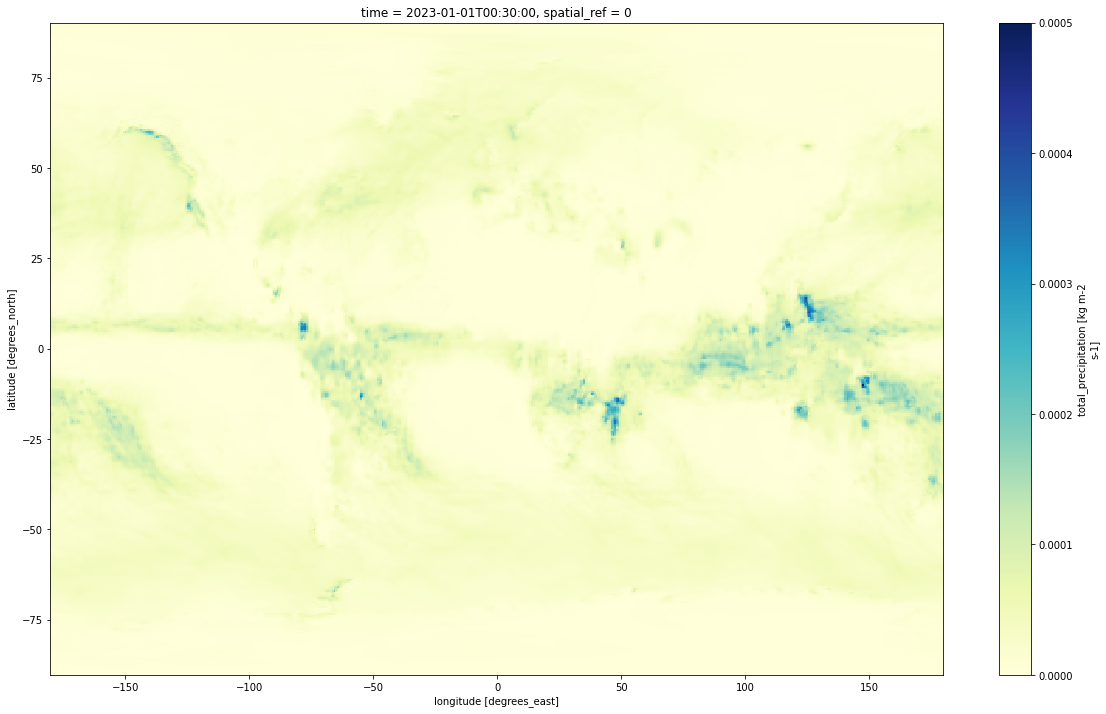

In [40]:
import matplotlib as mpl
import geopandas as gpd
import rasterio
import rasterio.plot
f_path = './data/nasa/MERRA2_400.tavgM_2d_flx_Nx.202301.nc4'
xr_data = xr.open_dataset(f_path)

plt.rcParams["figure.figsize"] = (20,12)

# getting the original colormap using cm.get_cmap() function
og_map=plt.cm.get_cmap('YlGnBu')
norm = mpl.colors.Normalize(vmin=0, vmax=0.5e-3)

# reversing the original colormap using reversed() function
r_map = og_map.reversed()


keys = ['PRECTOT','PRECTOTCORR']
xr_data[keys]
xr_data.rio.write_crs("epsg:3395", inplace=True)
xr_data['PRECTOTCORR'].plot(cmap=og_map,norm=norm)


/tmp/ipykernel_16757/1551099948.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data.area #!?


<AxesSubplot:title={'center':'time = 2023-01-01T00:30:00, spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

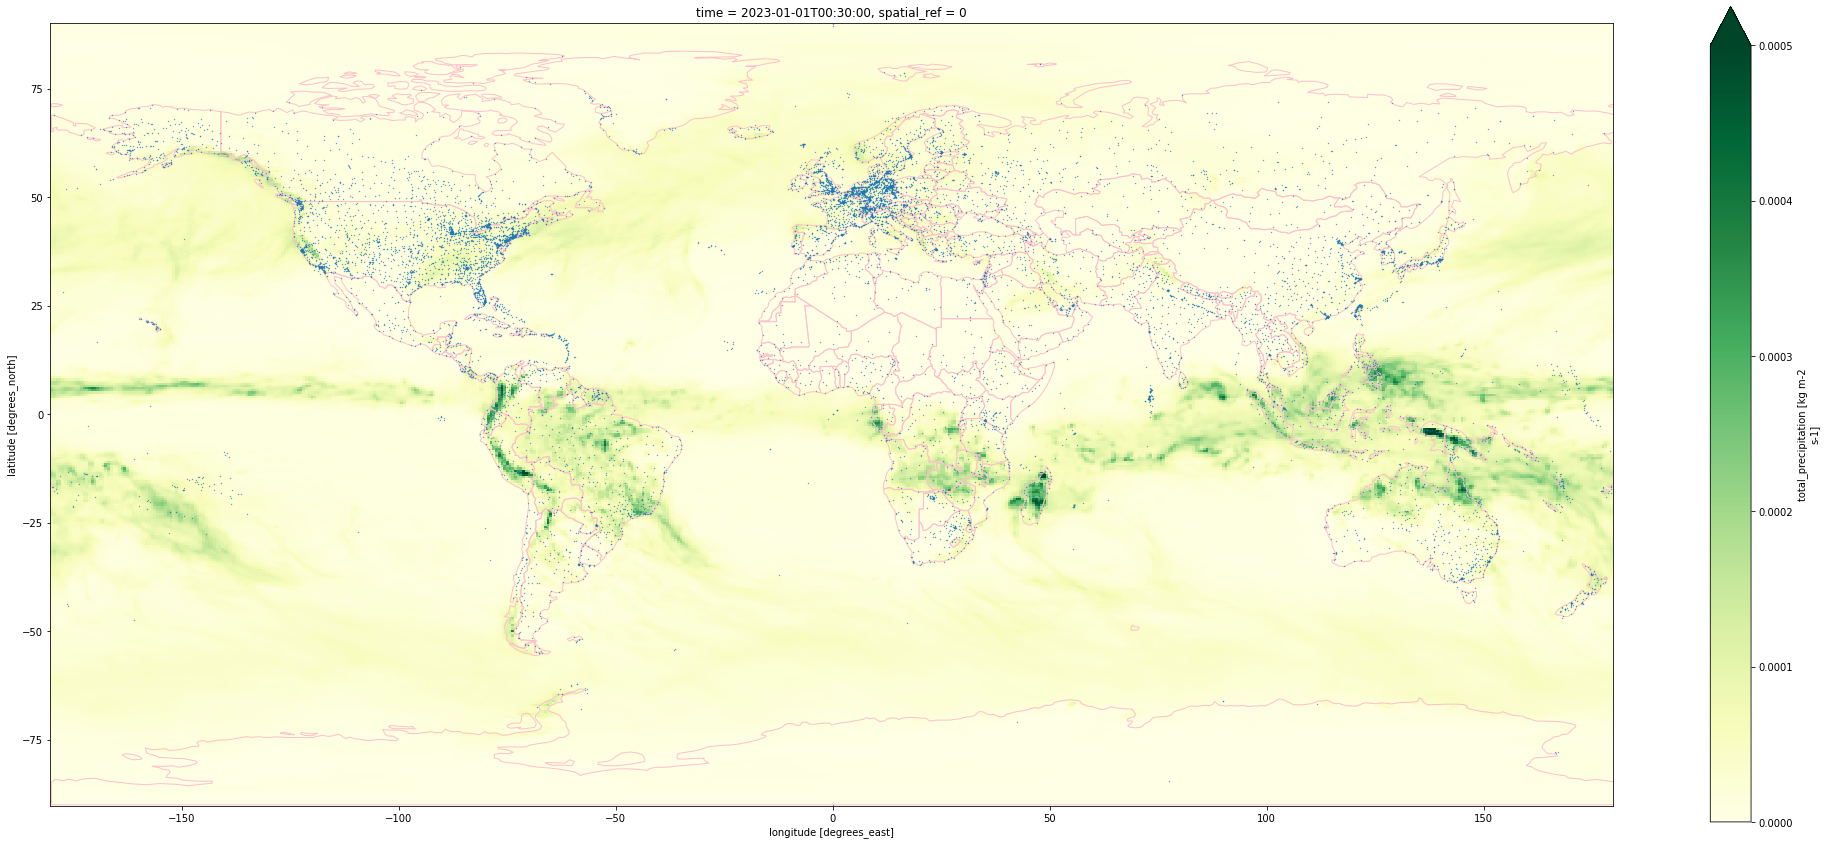

In [19]:
import geopandas as gpd
from pathlib import Path

data_folder = Path("./data/gadm")
fp = data_folder / "gadm41_DEU.gpkg"
data = gpd.read_file(fp)
data.area #!?

airports = pd.read_csv("./data/airports-extended.txt", 
                       names=["Airport ID", "Name", "City", "Country", "IATA","ICAO","Latitude", "Longitude",
                               "Altitude","TZ","DST","Tz","Type","Source"],
                       usecols=["Airport ID", "Name", "City", "Country", "ICAO","Latitude", "Longitude"],
                       header=None,
                       sep=',')
airports["geometry"] = gpd.points_from_xy(x=airports["Longitude"], 
                                          y=airports["Latitude"], 
                                          crs="EPSG:4326")

airports = gpd.GeoDataFrame(airports)
airports.head()


countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


fig, ax = plt.subplots(figsize=(35, 15))

xr_data['PRECTOT'].plot(ax=ax,cmap=plt.cm.get_cmap('YlGn'),norm=norm)
countries.plot(ax=ax, facecolor='none', edgecolor='pink')
airports.plot(markersize=0.1,ax=ax)




In [20]:
xarr = xr_data['PRECTOT']
df = xarr.to_dataframe().reset_index()

gdf = gpd.GeoDataFrame(df, 
                       geometry=gpd.points_from_xy(x=df.lon, y=df.lat, crs="EPSG:4326"))

gdf.describe()

,lat,lon,spatial_ref,PRECTOT
count,2.079360e+05,207936.000000,207936.0,2.079360e+05
mean,0.000000e+00,-0.312500,0.0,2.753994e-05
std,5.210579e+01,103.923142,0.0,3.633449e-05
min,-9.000000e+01,-180.000000,0.0,1.294353e-28
25%,-4.500000e+01,-90.156250,0.0,5.365315e-06
50%,-1.797510e-13,-0.312500,0.0,1.604701e-05
75%,4.500000e+01,89.531250,0.0,3.562717e-05
max,9.000000e+01,179.375000,0.0,1.182332e-03


In [21]:
gdf_val = gdf[(gdf['lat']==-77.0) & (gdf['lon']==-180)]#.plot(cmap='YlGn')
xr_val = xr_data.sel(lat=-77,lon=-180).PRECTOT

gdf_val, xr_val

(                     time   lat    lon  spatial_ref   PRECTOT  \
 14976 2023-01-01 00:30:00 -77.0 -180.0            0  0.000005   
 
                            geometry  
 14976  POINT (-180.00000 -77.00000)  ,
 <xarray.DataArray 'PRECTOT' (time: 1)>
 array([5.422308e-06], dtype=float32)
 Coordinates:
     lon          float64 -180.0
     lat          float64 -77.0
   * time         (time) datetime64[ns] 2023-01-01T00:30:00
     spatial_ref  int64 0
 Attributes:
     long_name:       total_precipitation
     units:           kg m-2 s-1
     fmissing_value:  1000000000000000.0
     vmax:            1000000000000000.0
     vmin:            -1000000000000000.0
     valid_range:     [-1.e+15  1.e+15])

<AxesSubplot:>

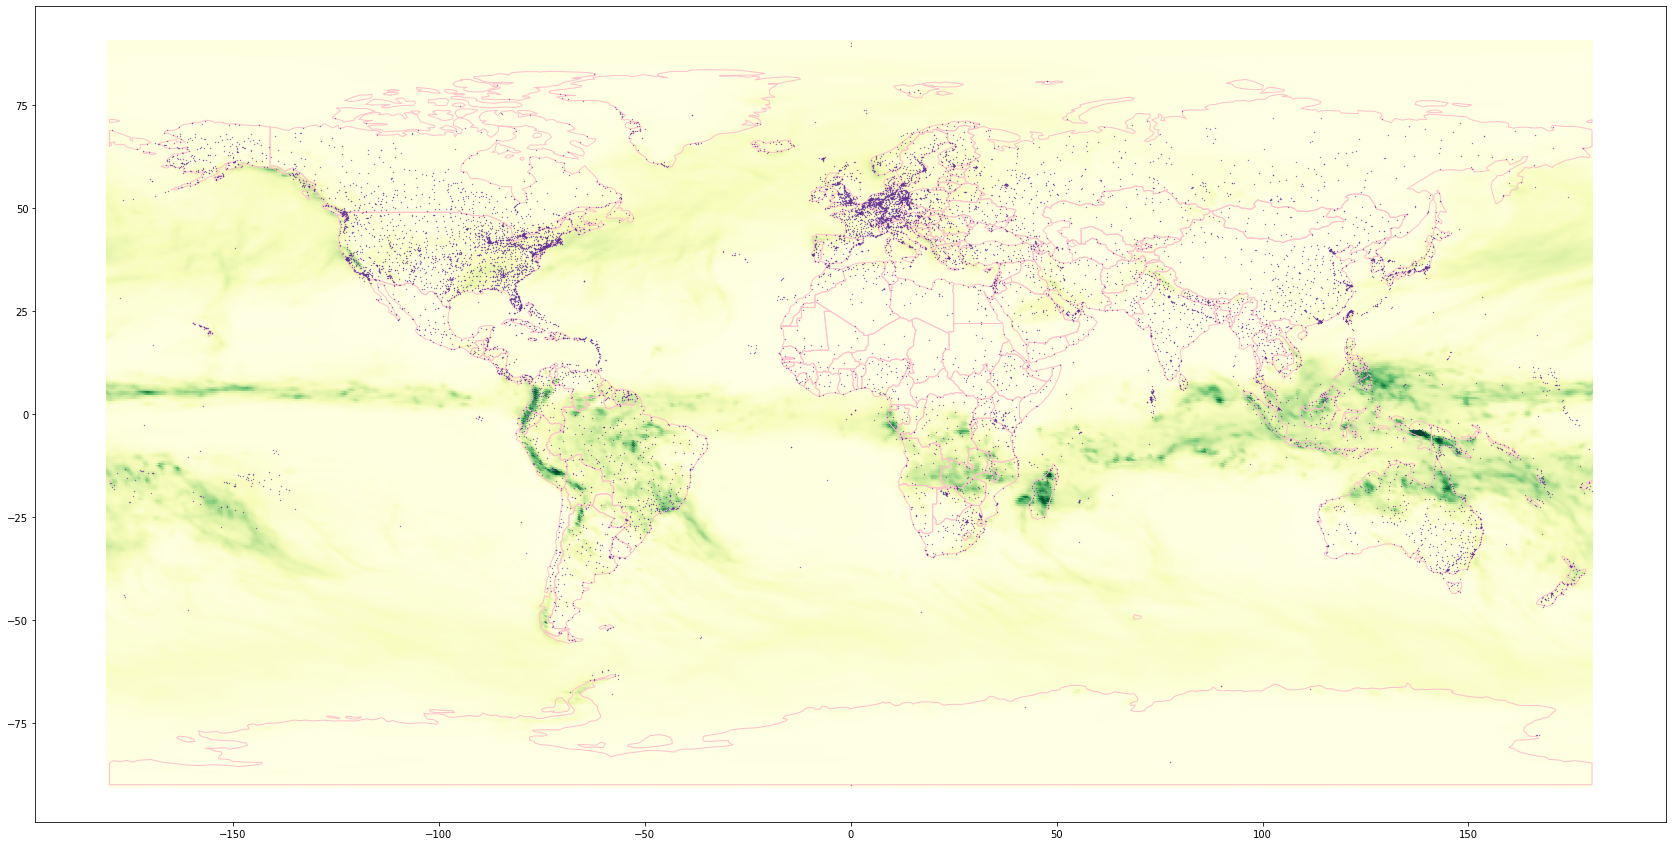

In [22]:
fig, ax = plt.subplots(figsize=(35, 15))

gdf.plot('PRECTOT',cmap='YlGn',ax=ax,vmin=0, vmax=0.5e-3)
countries.plot(ax=ax, facecolor='none', edgecolor='pink')
airports.plot(markersize=0.1,ax=ax,color='rebeccapurple')
